In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()

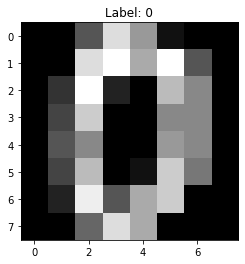

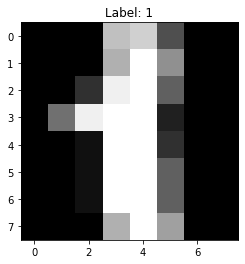

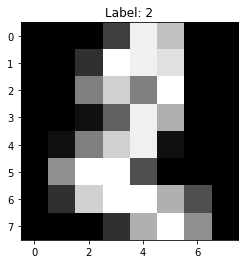

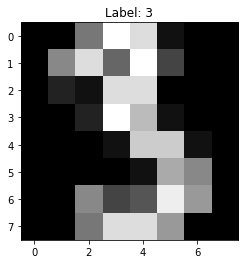

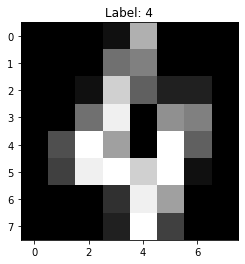

In [9]:
# Plot some examples of the images
for i in range(5):
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.show()

In [10]:
# Prepare the data for training
X = digits.images.reshape(-1, 64)
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [11]:
# Define the model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.h1 = nn.Linear(64, 128)
        self.h2=nn.Linear(128,256)
        self.h3 = nn.Linear(256, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        x = self.h1(x)
        x = self.relu(x)
        x = self.h2(x)
        x = self.relu(x)
        x = self.h3(x)
        x = self.softmax(x)
        return x


In [12]:
# Train the model
model = MLP()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"[{epoch + 1}] Loss: {running_loss / (i + 1)}")

# Evaluate the model on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model


hell tensor(2.5848, grad_fn=<NllLossBackward0>)
hell tensor(2.4078, grad_fn=<NllLossBackward0>)
hell tensor(2.3278, grad_fn=<NllLossBackward0>)
hell tensor(2.2169, grad_fn=<NllLossBackward0>)
hell tensor(2.1144, grad_fn=<NllLossBackward0>)
hell tensor(2.0671, grad_fn=<NllLossBackward0>)
hell tensor(2.0257, grad_fn=<NllLossBackward0>)
hell tensor(1.9267, grad_fn=<NllLossBackward0>)
hell tensor(1.9182, grad_fn=<NllLossBackward0>)
hell tensor(1.8522, grad_fn=<NllLossBackward0>)
hell tensor(1.8299, grad_fn=<NllLossBackward0>)
hell tensor(1.7355, grad_fn=<NllLossBackward0>)
hell tensor(1.7527, grad_fn=<NllLossBackward0>)
hell tensor(1.7394, grad_fn=<NllLossBackward0>)
hell tensor(1.6195, grad_fn=<NllLossBackward0>)
hell tensor(1.5849, grad_fn=<NllLossBackward0>)
hell tensor(1.4947, grad_fn=<NllLossBackward0>)
hell tensor(1.5211, grad_fn=<NllLossBackward0>)
hell tensor(1.4193, grad_fn=<NllLossBackward0>)
hell tensor(1.4132, grad_fn=<NllLossBackward0>)
[1] Loss: 1.877593183517456
hell tensor(